In [1]:
import math
from collections import Counter, defaultdict
from functools import partial

import graphviz 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.style.use("fivethirtyeight")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfstroke = pd.read_csv("/content/drive/MyDrive/CAMP/Coding/healthcare-dataset-stroke-data.csv")

In [4]:
dfstroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
dfstroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#handling missing value
#dropping column:'id'
mean=dfstroke['bmi'].mean()
dfstroke['bmi'].fillna(mean,inplace=True)
dfstroke['stroke']=dfstroke['stroke'].replace(1,'yes')
dfstroke['stroke']=dfstroke['stroke'].replace(0,'no')
dfstroke.isna().sum()
del dfstroke['id']
dfstroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 439.3+ KB


In [7]:
num=dfstroke.select_dtypes(include='number').columns.tolist()
cat=dfstroke.select_dtypes(include='object').columns.tolist()
print(num)
print(cat)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


In [8]:
dfstroke[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60


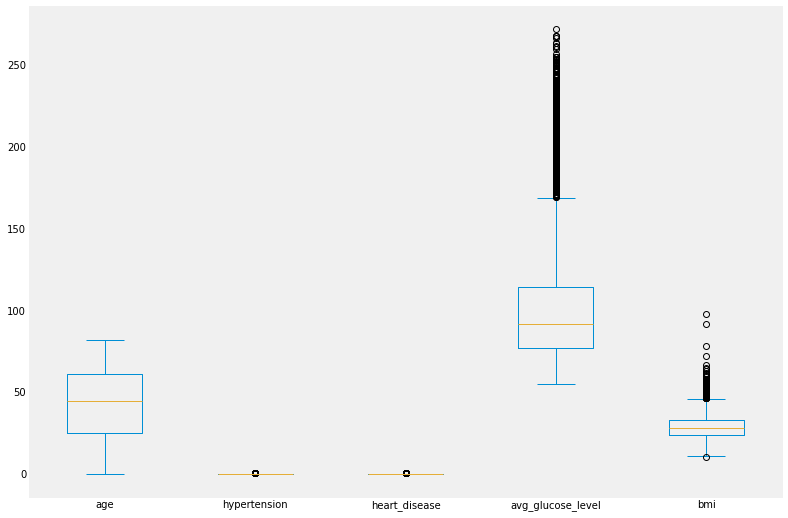

In [9]:
dfstroke[num].plot(kind='box',figsize=(12,9))
plt.grid(False)
plt.show()

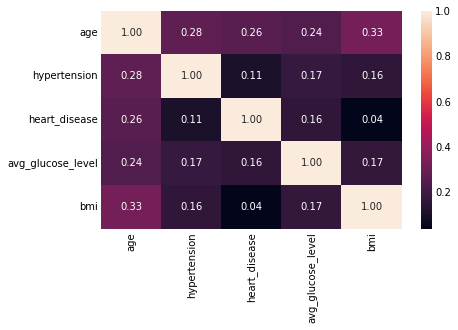

In [10]:
#correlation
sns.heatmap(dfstroke.corr(),annot=True,fmt='.2f')
plt.show()
#tolerance: 0.7, more than that, drop a column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


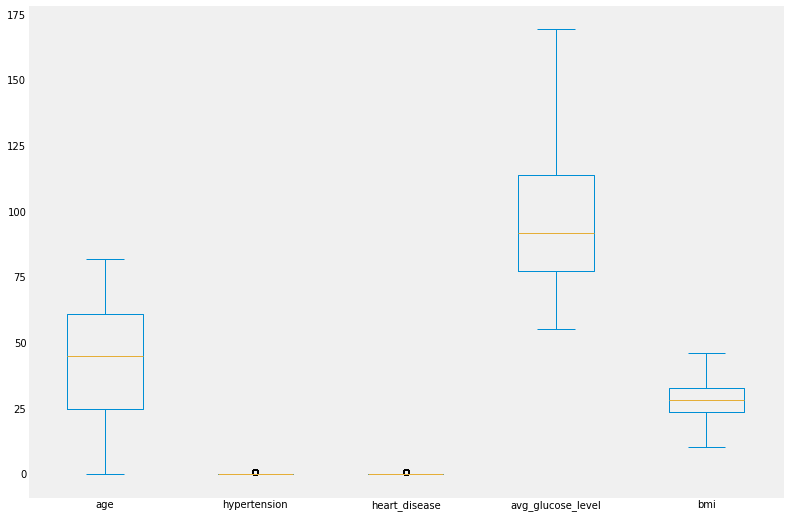

In [11]:
#handling outlier
q1=dfstroke[['avg_glucose_level','bmi']].quantile(0.25)
q3=dfstroke[['avg_glucose_level','bmi']].quantile(0.75)
IQR=q3-q1
max=q3+1.5*IQR
min=q1-1.5*IQR
dfstroke=dfstroke.mask(dfstroke>max,max,axis=1)
dfstroke=dfstroke.mask(dfstroke<min,min,axis=1)
dfstroke[num].plot(kind='box',figsize=(12,9))
plt.grid(False)
plt.show()

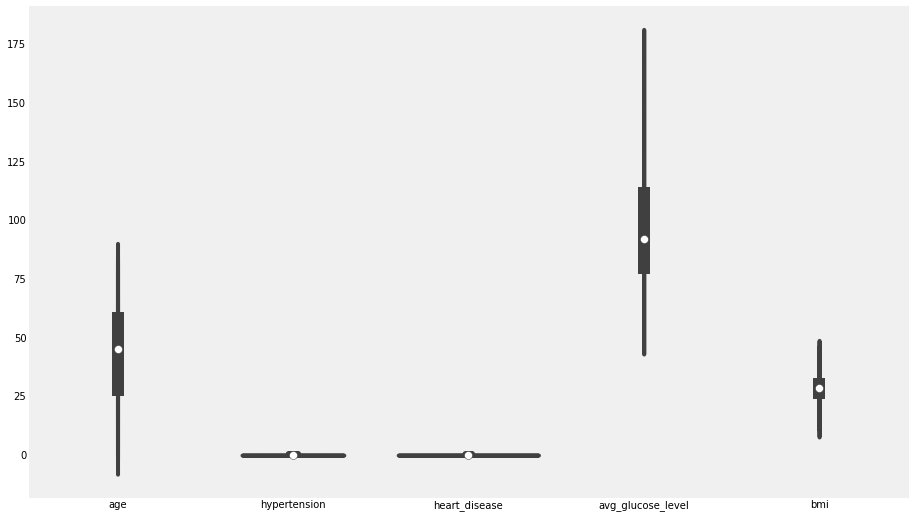

In [12]:
plt.figure(figsize=(14,9))
sns.violinplot(data=dfstroke[num])
plt.grid(False)
plt.show()

In [13]:
dfstroke.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.0000
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.0000
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.0000
avg_glucose_level,5110.0,100.996204,33.214738,55.12,77.245,91.885,114.09,169.3575
bmi,5110.0,28.721613,7.119940,10.30,23.800,28.400,32.80,46.3000


In [14]:
#unique value frequency
for i in cat:
  print(dfstroke[i].value_counts())
  print('')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

no     4861
yes     249
Name: stroke, dtype: int64



In [15]:
dfstroke[cat].describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892
stroke,5110,2,no,4861


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


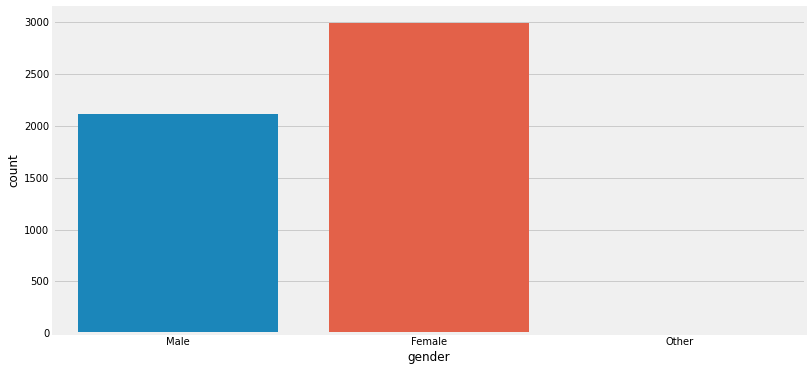

In [16]:
#count: gender
plt.figure(figsize=(12,6))
sns.countplot('gender',data=dfstroke)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


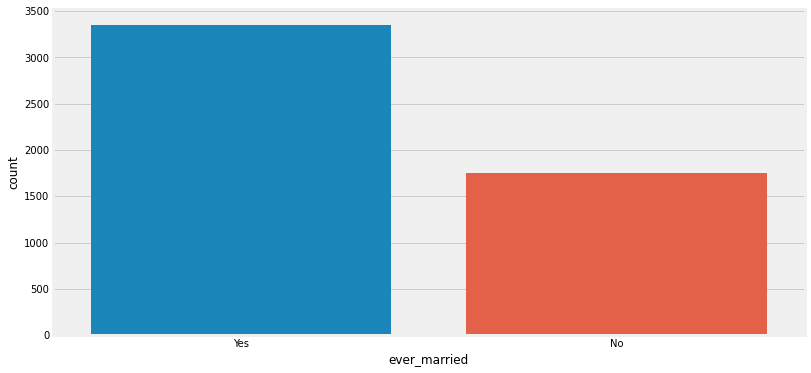

In [17]:
#count: marital status
plt.figure(figsize=(12,6))
sns.countplot('ever_married',data=dfstroke)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


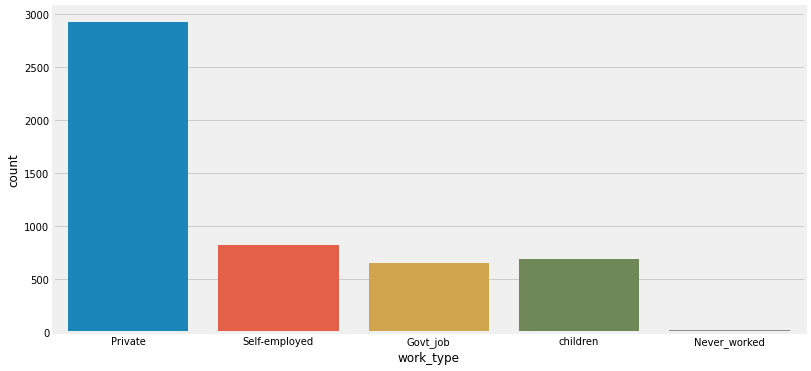

In [18]:
#count: work type
plt.figure(figsize=(12,6))
sns.countplot('work_type',data=dfstroke)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


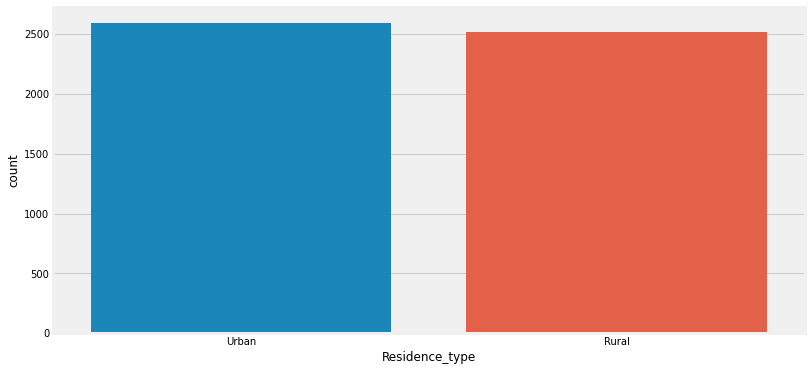

In [19]:
#count: residence type
plt.figure(figsize=(12,6))
sns.countplot('Residence_type',data=dfstroke)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


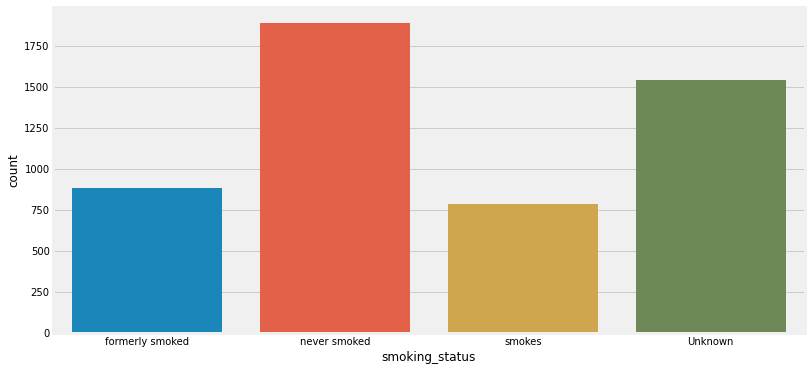

In [20]:
#count: smoking status
plt.figure(figsize=(12,6))
sns.countplot('smoking_status',data=dfstroke)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


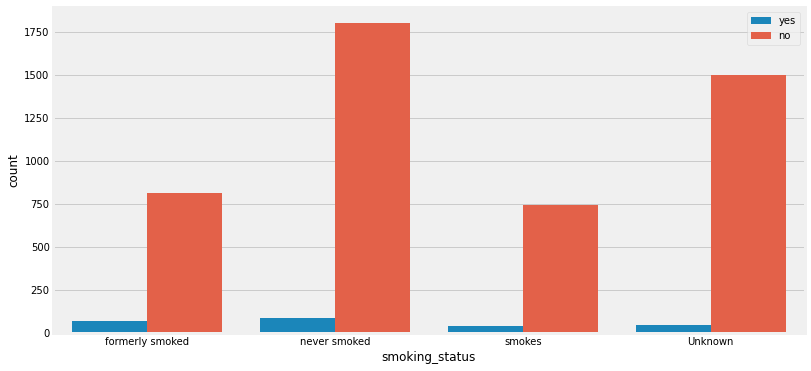

In [21]:
#atroke to smoking status
plt.figure(figsize=(12,6))
sns.countplot('smoking_status',data=dfstroke,hue='stroke')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


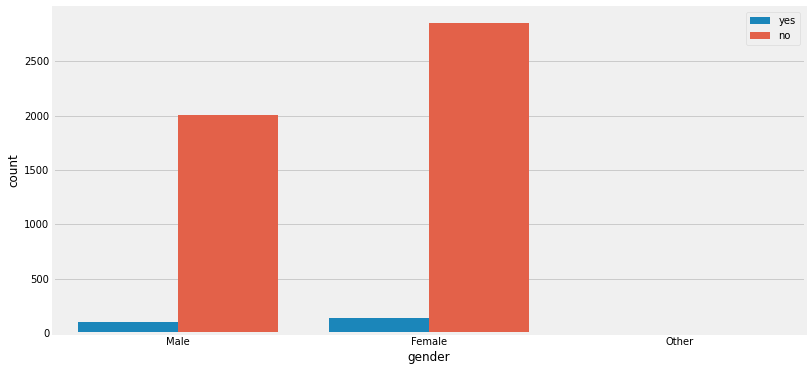

In [22]:
#stroke to gender
plt.figure(figsize=(12,6))
sns.countplot('gender',data=dfstroke,hue='stroke')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


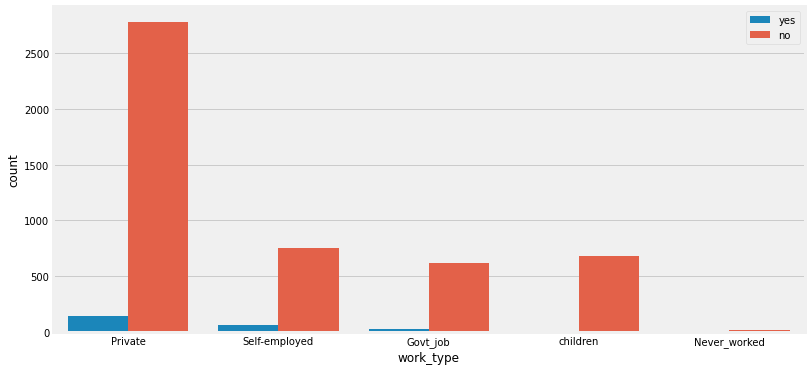

In [23]:
#stroke to work tyoe
plt.figure(figsize=(12,6))
sns.countplot('work_type',data=dfstroke,hue='stroke')
plt.legend(loc='best')
plt.show()

In [24]:
x=dfstroke.drop(columns=['stroke']).copy()
y=dfstroke['stroke'].copy()

In [25]:
#splitting the data
#70 20 10
xtrain,xrest,ytrain,yrest=train_test_split(x,y,test_size=.3,stratify=y,random_state=11)
xdev,xtest,ydev,ytest=train_test_split(xrest,yrest,test_size=(1/3),stratify=yrest,random_state=11)

print(f"training size: {xtrain.shape[0]} ({100*xtrain.shape[0] / x.shape[0]:.2f}%)")
print(f"dev size: {xdev.shape[0]} ({100*xdev.shape[0] / x.shape[0]:.2f}%)")
print(f"test size: {xtest.shape[0]} ({100*xtest.shape[0] / x.shape[0]:.2f}%)")

training size: 3577 (70.00%)
dev size: 1022 (20.00%)
test size: 511 (10.00%)


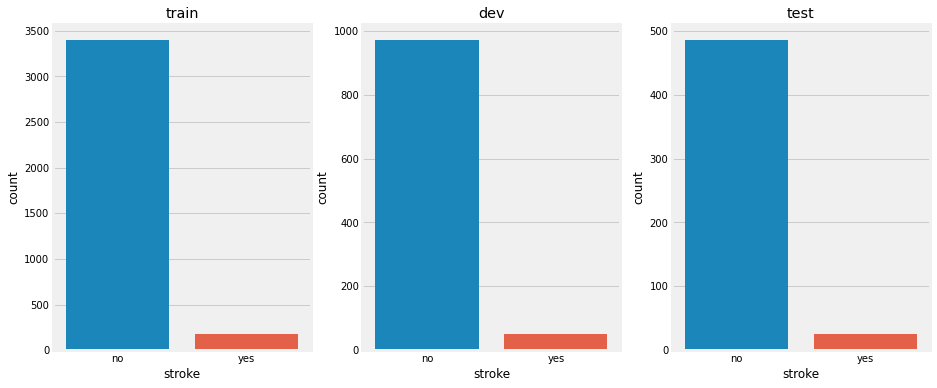

In [26]:
fig,axis=plt.subplots(1,3,figsize=(14,6))
for i,label in enumerate([(ytrain,'train'),(ydev,'dev'),(ytest,'test')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [27]:
#categorical encoding
nomfeat=['gender','ever_married']
orfeat=x.select_dtypes(include='object').drop(columns=nomfeat).columns.tolist()
print("nomfeat:", nomfeat)
print("orfeat:",orfeat)

nomfeat: ['gender', 'ever_married']
orfeat: ['work_type', 'Residence_type', 'smoking_status']


In [28]:
#nominal features encoding
onehot=OneHotEncoder()
onehot.fit(xtrain[nomfeat])
xtrain_oh=pd.DataFrame(onehot.transform(xtrain[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
xdev_oh=pd.DataFrame(onehot.transform(xdev[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
xtest_oh=pd.DataFrame(onehot.transform(xtest[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
display(xtrain_oh)

#ordinal features encoding
ordinal=OrdinalEncoder()
ordinal.fit(xtrain[orfeat])
xtrain_or=pd.DataFrame(ordinal.transform(xtrain[orfeat]),columns=ordinal.feature_names_in_)
xdev_or=pd.DataFrame(ordinal.transform(xdev[orfeat]),columns=ordinal.feature_names_in_)
xtest_or=pd.DataFrame(ordinal.transform(xtest[orfeat]),columns=ordinal.feature_names_in_)
display(xtrain_or)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
3572,0.0,1.0,0.0,0.0,1.0
3573,1.0,0.0,0.0,0.0,1.0
3574,1.0,0.0,0.0,0.0,1.0
3575,1.0,0.0,0.0,1.0,0.0


,work_type,Residence_type,smoking_status
0,2.0,0.0,0.0
1,2.0,1.0,3.0
2,2.0,1.0,1.0
3,3.0,0.0,0.0
4,3.0,0.0,0.0
...,...,...,...
3572,2.0,0.0,2.0
3573,2.0,1.0,0.0
3574,2.0,1.0,1.0
3575,2.0,1.0,3.0


In [29]:
#Data Frame Concat
xtrain_comb=pd.concat([xtrain[num].reset_index(drop=True),xtrain_oh,xtrain_or],axis=1)
xdev_comb=pd.concat([xdev[num].reset_index(drop=True),xdev_oh,xdev_or],axis=1)
xtest_comb=pd.concat([xtest[num].reset_index(drop=True),xtest_oh,xtest_or],axis=1)
xtrain_comb.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type,Residence_type,smoking_status
0,28.0,0,0,84.5900,23.500000,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,17.0,0,0,87.7200,25.900000,1.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0
2,82.0,1,0,169.3575,28.893237,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
3,43.0,0,0,92.4000,22.700000,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
4,58.0,0,0,57.5700,26.800000,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0


In [30]:
#Rescaling
scaler=StandardScaler()
scaler.fit(xtrain_comb)

xtrain_scal=pd.DataFrame(scaler.transform(xtrain_comb),columns=xtrain_comb.columns)
xdev_scal=pd.DataFrame(scaler.transform(xdev_comb),columns=xdev_comb.columns)
xtest_scal=pd.DataFrame(scaler.transform(xtest_comb),columns=xtest_comb.columns)

xtrain_scal.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type,Residence_type,smoking_status
0,-0.693418,-0.337614,-0.245927,-0.481048,-0.743862,0.830935,-0.830455,-0.016723,1.404778,-1.404778,-0.141561,-1.020050,-1.292360
1,-1.183353,-0.337614,-0.245927,-0.386617,-0.405074,0.830935,-0.830455,-0.016723,1.404778,-1.404778,-0.141561,0.980344,1.523542
2,1.711715,2.961963,-0.245927,2.076363,0.017455,0.830935,-0.830455,-0.016723,-0.711857,0.711857,-0.141561,0.980344,-0.353726
3,-0.025326,-0.337614,-0.245927,-0.245423,-0.856791,0.830935,-0.830455,-0.016723,1.404778,-1.404778,0.780777,-1.020050,-1.292360
4,0.642767,-0.337614,-0.245927,-1.296234,-0.278029,0.830935,-0.830455,-0.016723,-0.711857,0.711857,0.780777,-1.020050,-1.292360


In [31]:
#modelling
model=DecisionTreeClassifier(max_depth=int(5),
                             random_state=11)


In [32]:
model.fit(xtrain_scal,ytrain)

#predict
pred_train=model.predict(xtrain_scal)
pred_dev=model.predict(xdev_scal)
pred_test=model.predict(xtest_scal)

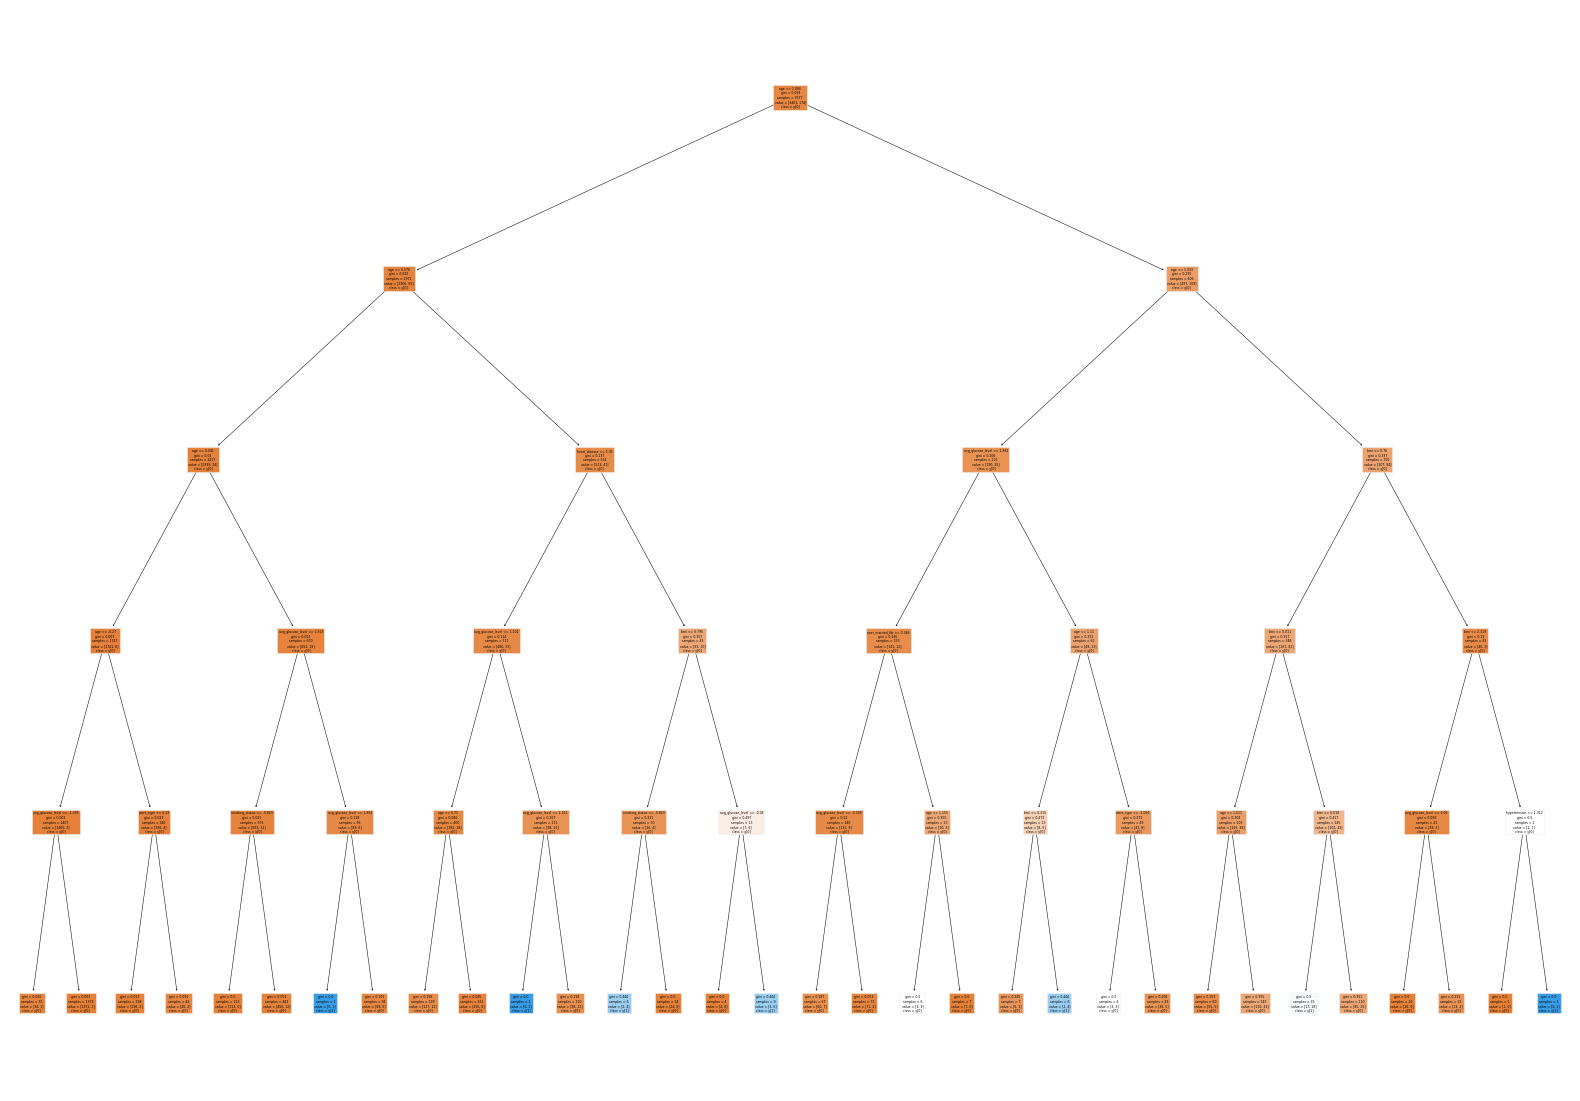

In [34]:
plt.figure(figsize=(25, 20))
plot_tree(
    model,
    feature_names=model.feature_names_in_,
    class_names=True,
    filled=True,
)
plt.show()

In [35]:
#evaluation
#accuracy score
print('train acc score: ',accuracy_score(ytrain,pred_train))
print('dev acc score: ',accuracy_score(ydev,pred_dev))
print('test acc score: ',accuracy_score(ytest,pred_test))


train acc score:  0.9544310875034946
dev acc score:  0.9452054794520548
test acc score:  0.949119373776908


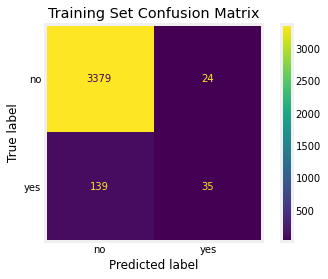

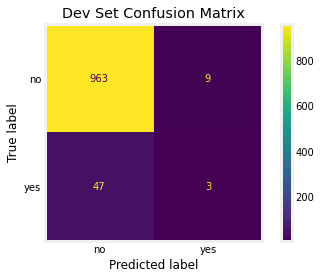

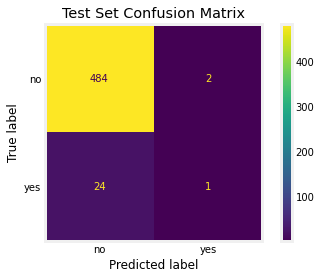

In [36]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(ytrain,pred_train)
plt.title('Training Set Confusion Matrix')
plt.grid(False)
plt.show()

ConfusionMatrixDisplay.from_predictions(ydev,pred_dev)
plt.title('Dev Set Confusion Matrix')
plt.grid(False)
plt.show()

ConfusionMatrixDisplay.from_predictions(ytest,pred_test)
plt.title('Test Set Confusion Matrix')
plt.grid(False)
plt.show()



In [37]:
#report
print('classification report for train set')
print(classification_report(ytrain, pred_train))
print('classification report for dev set')
print(classification_report(ydev, pred_dev))
print('classification report for test set')
print(classification_report(ytest, pred_test))

classification report for train set
              precision    recall  f1-score   support

          no       0.96      0.99      0.98      3403
         yes       0.59      0.20      0.30       174

    accuracy                           0.95      3577
   macro avg       0.78      0.60      0.64      3577
weighted avg       0.94      0.95      0.94      3577

classification report for dev set
              precision    recall  f1-score   support

          no       0.95      0.99      0.97       972
         yes       0.25      0.06      0.10        50

    accuracy                           0.95      1022
   macro avg       0.60      0.53      0.53      1022
weighted avg       0.92      0.95      0.93      1022

classification report for test set
              precision    recall  f1-score   support

          no       0.95      1.00      0.97       486
         yes       0.33      0.04      0.07        25

    accuracy                           0.95       511
   macro avg       0.64

In [38]:
colnames=(num+onehot.get_feature_names_out().tolist()+ordinal.feature_names_in_.tolist())
xprocessed=pd.concat([x[num].reset_index(drop=True),
                      pd.DataFrame(onehot.transform(x[nomfeat]).toarray(),columns=onehot.get_feature_names_out().tolist()),
                      pd.DataFrame(ordinal.transform(x[orfeat]),columns=ordinal.feature_names_in_.tolist()),
                      ],axis=1)
xprocessed_scaled=pd.DataFrame(scaler.transform(xprocessed),columns=xprocessed.columns)
predfull=model.predict(xprocessed_scaled)
xfinal=x.assign(prediction=predfull)
xfinal.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,prediction
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,yes
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,no
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,no
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,no
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,no


In [39]:
xfinal.to_csv('/content/drive/MyDrive/CAMP/Coding/prediction result.csv',index=False)